# Money Count of a Node Over Iterations

This notebook visualizes the money count of a specific node as a function of simulation iterations.

In [17]:
# Import Required Libraries
import matplotlib.pyplot as plt
import numpy as np

## Summary/Problems
In this experiment all graphs are on the same random seed so that money distribution and weight matrix are replicable. All node weight's are calculated by 1/n (n being the number of outgoing connections). Problems: connections aren't randomized, self-loop trigger behavior is first-come-first-serve. How can I measure randomly generated graphs and compare them with one another while measuring the effect that a self loop has on the principle eigenvector?

## Load or Simulate Money Distribution Data

Load existing simulation data or run a simulation to get the money count for each node at each iteration.

In [18]:
# Run the actual simulation for multiple max_stingy_behaviors values and collect money counts for each node at each iteration

from simulation import TokenSimulation
import parameters as P

num_iterations = P.NUM_ITERATIONS
max_stingy_values = list(range(0, P.NUM_NODES + 1))  # You can adjust this range as needed

all_money_histories = {}  # key: max_stingy_behaviors, value: money_history array
node_list = None

for max_stingy in max_stingy_values:
    sim = TokenSimulation(max_stingy_behaviors=max_stingy)
    states, layout, edge_mat = sim.run_simulation(iterations=num_iterations)
    if node_list is None:
        graph0 = states[0][0]
        node_list = [n for n in graph0.nodes]
    money_history = []
    for graph, _ in states:
        money_history.append([graph.nodes[n]["money"] for n in node_list])
    all_money_histories[max_stingy] = np.array(money_history)

## Plot Money Count Over Iterations for Selected Node

Visualize the money count of the selected node as a line graph.

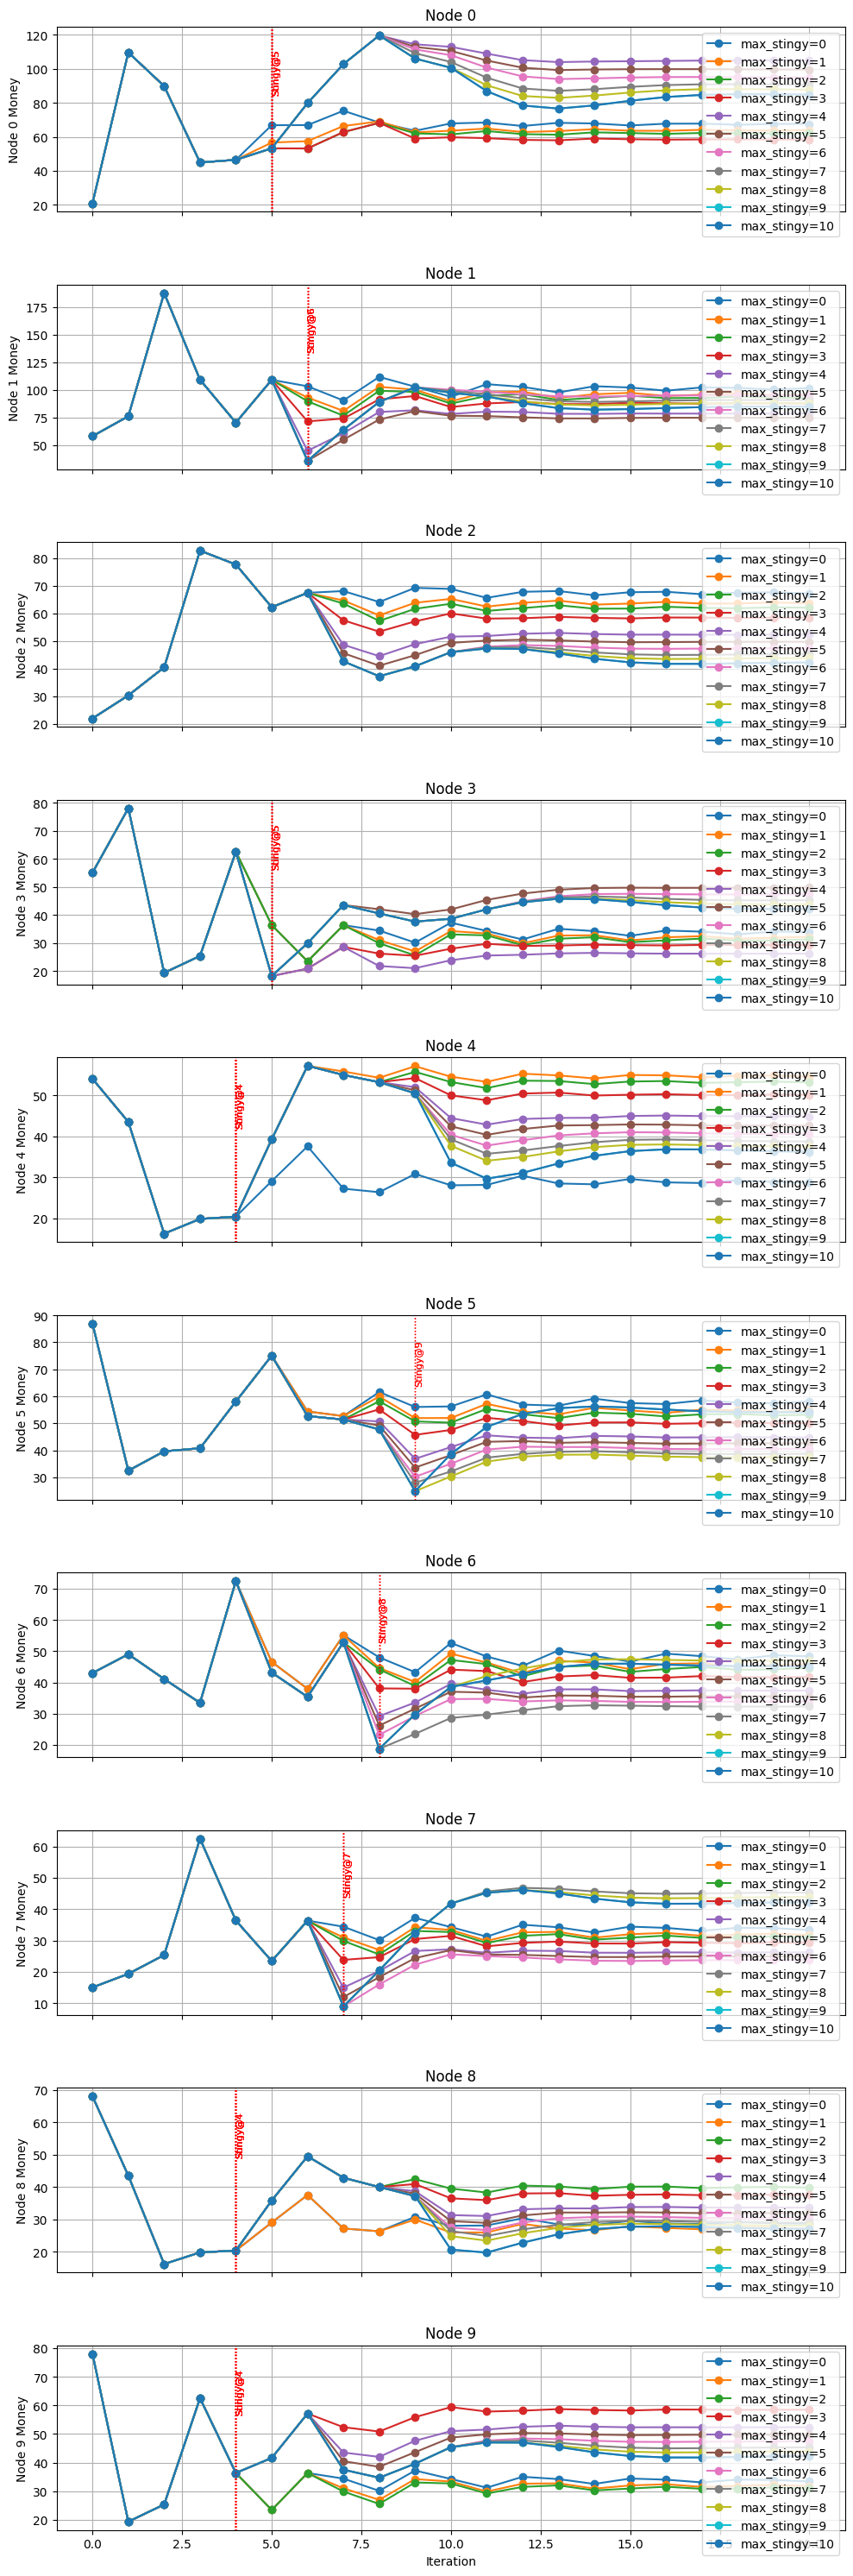

In [19]:
# Plot the money count over iterations for every node in subplots, with a line for each max_stingy_behaviors value and markers for when each node becomes stingy
num_nodes = len(node_list)
fig, axes = plt.subplots(num_nodes, 1, figsize=(10, 3*num_nodes), sharex=True)

if num_nodes == 1:
    axes = [axes]  # Ensure axes is always a list

for i in range(num_nodes):
    for max_stingy, money_history in all_money_histories.items():
        axes[i].plot(
            range(money_history.shape[0]),
            money_history[:, i],
            marker='o',
            label=f"max_stingy={max_stingy}"
        )
        if max_stingy != 0:
            # Find the first iteration where the node becomes stingy (self-loop appears)
            sim = TokenSimulation(max_stingy_behaviors=max_stingy)
            states, _, _ = sim.run_simulation(iterations=money_history.shape[0])
            stingy_iter = None
            for it, (graph, _) in enumerate(states):
                if graph.has_edge(node_list[i], node_list[i]):
                    stingy_iter = it
                    break
            if stingy_iter is not None and stingy_iter != 0:
                axes[i].axvline(stingy_iter, color='red', linestyle=':', linewidth=1)
                axes[i].text(stingy_iter, axes[i].get_ylim()[1]*0.9, f'Stingy@{stingy_iter}', color='red', fontsize=8, rotation=90, va='top')
    axes[i].set_ylabel(f'Node {i} Money')
    axes[i].grid(True)
    axes[i].set_title(f'Node {i}')
    axes[i].legend()

axes[-1].set_xlabel('Iteration')
plt.tight_layout()
plt.show()

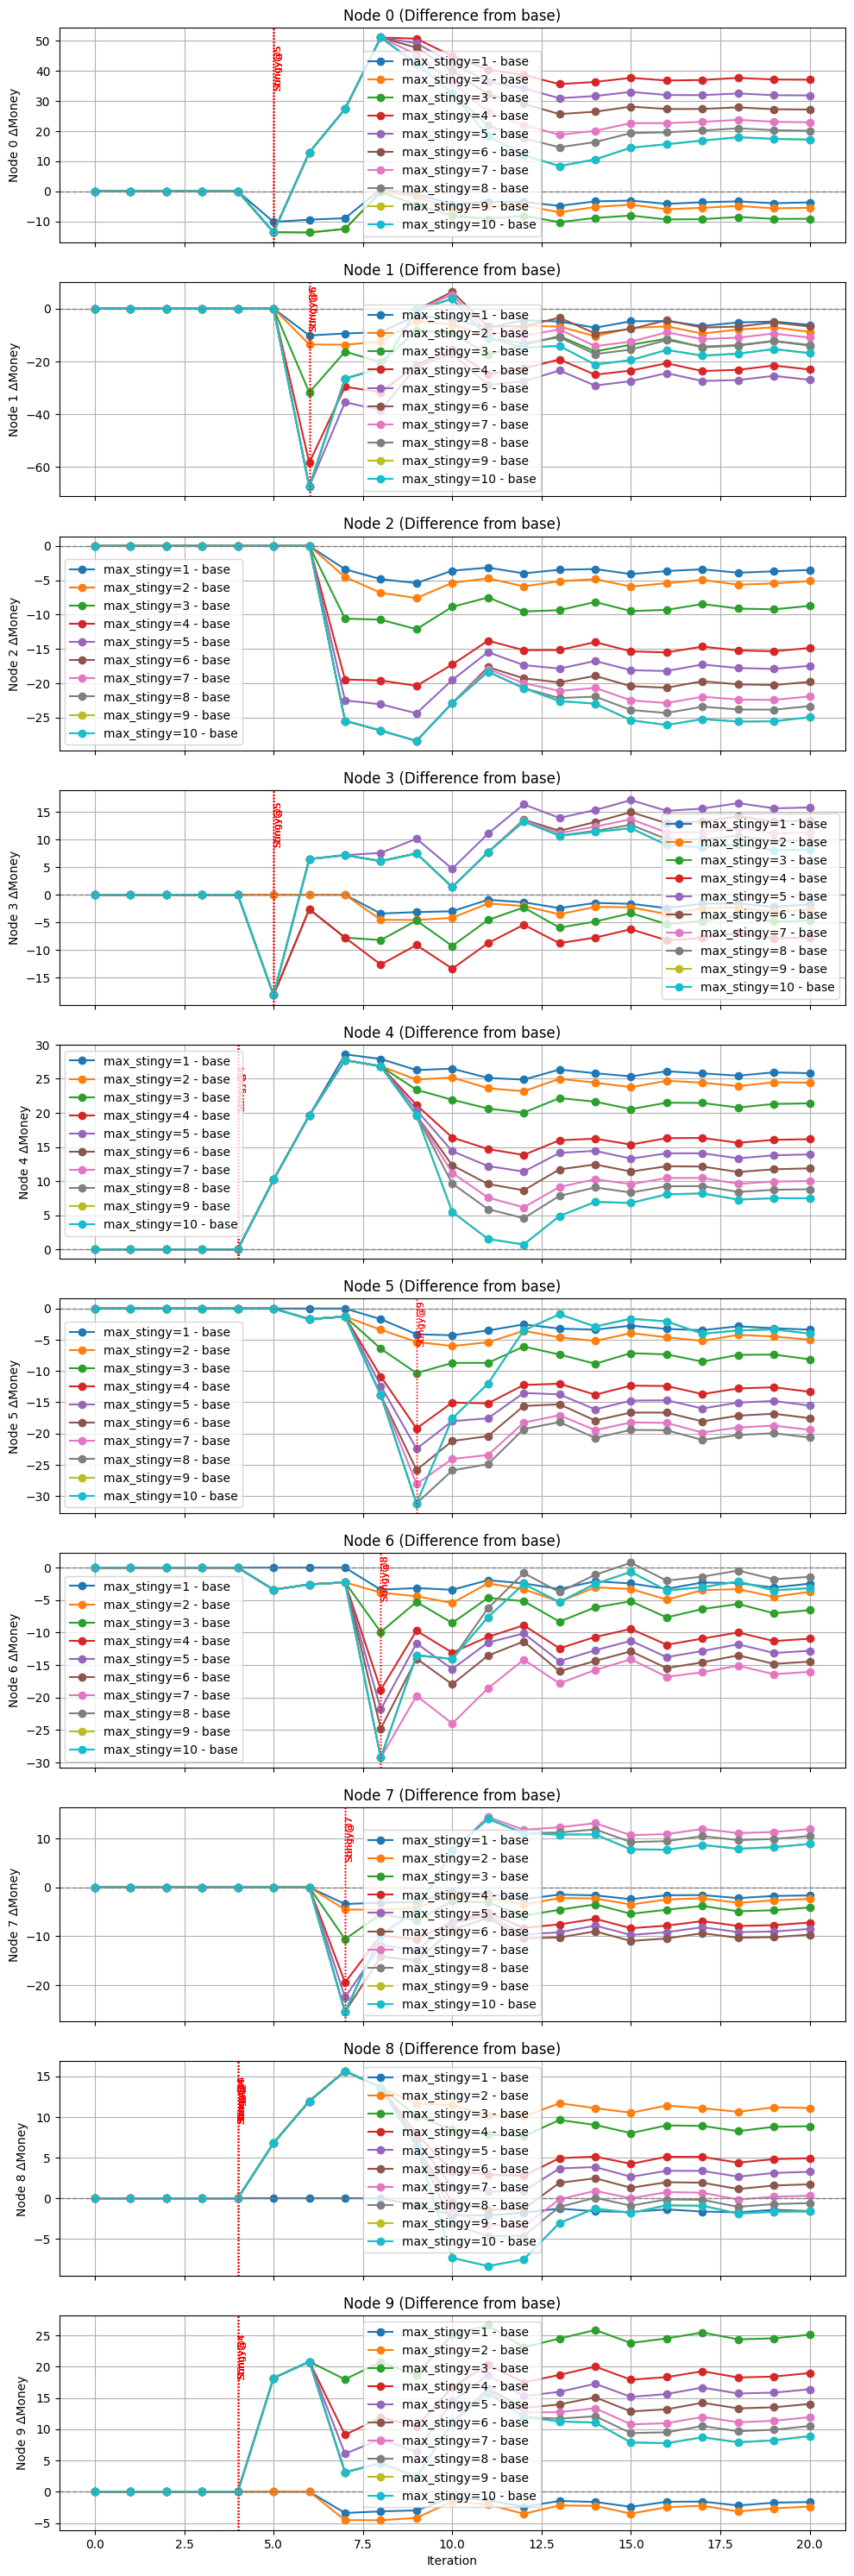

In [20]:
# Plot the difference in money from the base (0 stingy behaviors) for every node in subplots, with markers for when each node becomes stingy
base_history = all_money_histories[0]
num_nodes = len(node_list)
fig, axes = plt.subplots(num_nodes, 1, figsize=(10, 3*num_nodes), sharex=True)

if num_nodes == 1:
    axes = [axes]

for i in range(num_nodes):
    for max_stingy, money_history in all_money_histories.items():
        if max_stingy == 0:
            continue  # Skip base
        diff = money_history[:, i] - base_history[:, i]
        axes[i].plot(
            range(diff.shape[0]),
            diff,
            marker='o',
            label=f"max_stingy={max_stingy} - base"
        )
        # Find the first iteration where the node becomes stingy (self-loop appears)
        sim = TokenSimulation(max_stingy_behaviors=max_stingy)
        states, _, _ = sim.run_simulation(iterations=money_history.shape[0])
        stingy_iter = None
        for it, (graph, _) in enumerate(states):
            if graph.has_edge(node_list[i], node_list[i]):
                stingy_iter = it
                break
        if stingy_iter is not None and stingy_iter != 0:
            axes[i].axvline(stingy_iter, color='red', linestyle=':', linewidth=1)
            axes[i].text(stingy_iter, axes[i].get_ylim()[1]*0.9, f'Stingy@{stingy_iter}', color='red', fontsize=8, rotation=90, va='top')
    axes[i].axhline(0, color='gray', linestyle='--', linewidth=1)
    axes[i].set_ylabel(f'Node {i} ΔMoney')
    axes[i].grid(True)
    axes[i].set_title(f'Node {i} (Difference from base)')
    axes[i].legend()

axes[-1].set_xlabel('Iteration')
plt.tight_layout()
plt.show()